# Relationships in Chocolate Bar Ratings Data

## Index
### 01. Import Libraries
### 02. Import Dataset
### 0.3 Exploring Heatmaps
### 0.4 Exploring Scatter Plots
### 0.5 Creating Pair Plots
### 0.6 Creating Categorical Plots
### 0.7 Answers and Hypothesis

# 0.1 Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 0.2 Import Data 

In [2]:
# create path to folder
path = r'C:\Users\chris\OneDrive\Documents\2-7-2024 Final Project'

In [3]:
# import dataset
df_cacao = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','chocolate_bar_ratings_clean.csv'), index_col = 0)

In [4]:
#check dataset
df_cacao

company company_location  review_date country_of_bean_origin  \
0       5150           U.S.A.         2019               Tanzania   
1       5150           U.S.A.         2019             Madagascar   
2       5150           U.S.A.         2019     Dominican Republic   
3       5150           U.S.A.         2021                   Fiji   
4       5150           U.S.A.         2021                  India   
...      ...              ...          ...                    ...   
2583  Zotter          Austria         2014                  Blend   
2584  Zotter          Austria         2017               Colombia   
2585  Zotter          Austria         2018                  Blend   
2586  Zotter          Austria         2018                  Congo   
2587  Zotter          Austria         2018                 Belize   

          specific_bean_or_bar_origin  cocoa_percent   ingredients  \
0               Kokoa Kamili, batch 1           0.76      3- B,S,C   
1              Bejofo Estate, batch 1           0.76      3- B,S,C   
2                     Zorzal, batch 1           0.76      3- B,S,C   
3               Matasawalevu, batch 1           0.68      3- B,S,C   
4                   Anamalai, batch 1           0.68      3- B,S,C   
...                               ...            ...           ...   
2583                              Raw           0.80  4- B,S*,C,Sa   
2584                 APROCAFA, Acandi           0.75      3- B,S,C   
2585  Dry Aged, 30 yr Anniversary bar           0.75      3- B,S,C   
2586            Mountains of the Moon           0.70      3- B,S,C   
2587                         Maya Mtn           0.72      3- B,S,C   

     most_memorable_characteristics  rating  
0         rich cocoa, fatty, bready    3.25  
1      cocoa, blackberry, full body    3.75  
2            cocoa, vegetal, savory    3.50  
3               chewy, off, rubbery    3.00  
4     milk brownie, macadamia,chewy    3.50  
...                             ...     ...  
2583         waxy, cloying, vegetal    2.75  
2584      strong nutty, marshmallow    3.75  
2585           fatty, earthy, cocoa    3.00  
2586   fatty, mild nuts, mild fruit    3.25  
2587      muted, roasty, accessible    3.50  

[2588 rows x 9 columns]

In [5]:
# verify size of dataframe
df_cacao.shape

(2588, 9)

In [6]:
# creating new subset dataframe by dropping unneeded columns
df_cacao_1 = df_cacao[['cocoa_percent','rating']]

In [7]:
# verify new dataframe
df_cacao_1

cocoa_percent  rating
0              0.76    3.25
1              0.76    3.75
2              0.76    3.50
3              0.68    3.00
4              0.68    3.50
...             ...     ...
2583           0.80    2.75
2584           0.75    3.75
2585           0.75    3.00
2586           0.70    3.25
2587           0.72    3.50

[2588 rows x 2 columns]

# 0.3 Exploring Heatmap Matrix

In [8]:
# create heat map
df_cacao_1.corr()

cocoa_percent    rating
cocoa_percent       1.000000 -0.144569
rating             -0.144569  1.000000

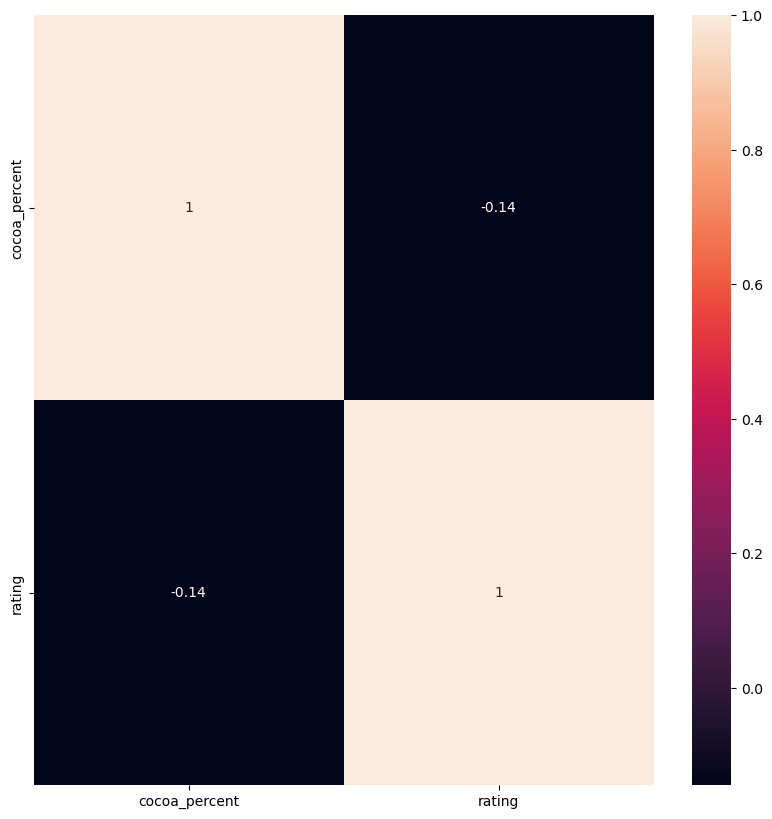

In [9]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_cacao_1.corr(), annot = True, ax = ax)

### Explanation

The heat map indicates that there is weak inverse correlation between the rating given to a chocolate bar and the percentage of cocoa in a bar. This possibly due to the fact that peoples ratings are subjective and not every person has the same preference for a specified amount of cocoa in a chocolate bar. Other factors, such as ingredients and been origin could also be affecting the final ratings, which are not taken into account in this matrix.


# 0.4 Exploring Scatter Plots

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


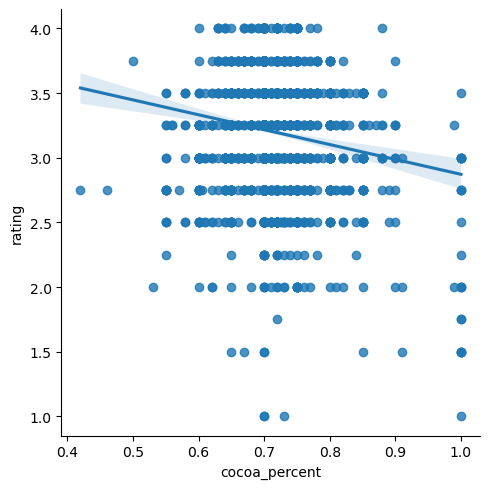

In [10]:
# Create scatterplot for 'rating' and 'cocoa_percent'
sns.lmplot(x = 'cocoa_percent', y = 'rating', data = df_cacao)

### Explanation

The above scatterplot showcases that all the values between the rating and cocoa percent are spread out, and better showcases the weak correlation between both variables.

# 0.5 Creating Pair Plot

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


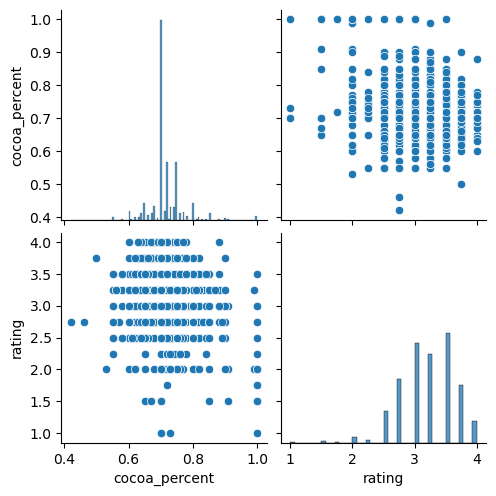

In [11]:
#create pair plot of dataset
pair_plot = sns.pairplot(df_cacao_1)

### Explanation
The pair plot does not much difference compared to the previous plots as expected. This id due to the fact that there are only two available continuos valuables to explore in this dataset. The top left Histogram shows that there are a few outliers present in the cocoa_percent column. The bottom right histogram shows a standard bell shape, with a few outliers skewing to the left, which suggests most chocolate bar ratings are of medium to high quality. 

# 0.6 Creating Categorical Plot

<Axes: xlabel='rating', ylabel='Count'>

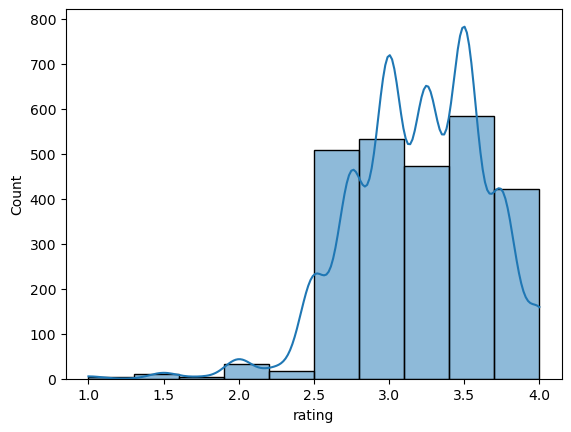

In [12]:
# Creating a histogram to see distribution
sns.histplot(df_cacao['rating'], bins = 10
            , kde = True)

In [13]:
# Create 'Rating Category' category column and 'Unpleasant' category variable
df_cacao.loc[df_cacao['rating'] < 2 , 'Rating Category'] = 'Unpleasant'

In [14]:
# Create 'Disapointing' category variable for 'Rating Category'
df_cacao.loc[(df_cacao['rating'] >= 2) & (df_cacao['rating'] < 3), 'Rating Category'] = 'Disapointing'

In [15]:
# Create 'Recommended' category variable for 'Rating Category'
df_cacao.loc[(df_cacao['rating'] >= 3) & (df_cacao['rating'] < 3.5), 'Rating Category'] = 'Recommended'

In [16]:
# Create 'Highly Recommended' category variable for 'Rating Category'
df_cacao.loc[(df_cacao['rating'] >= 3.5) & (df_cacao['rating'] < 4), 'Rating Category'] = 'Highly Recommended'

In [17]:
# Create 'Outstanding' category variable
df_cacao.loc[df_cacao['rating'] >= 4.0, 'Rating Category'] = 'Outstanding'

In [18]:
# Verify value counts in 'Rating Category'
df_cacao['Rating Category'].value_counts(dropna = False)

Rating Category
Recommended           1008
Highly Recommended     890
Disapointing           558
Outstanding            115
Unpleasant              17
Name: count, dtype: int64

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


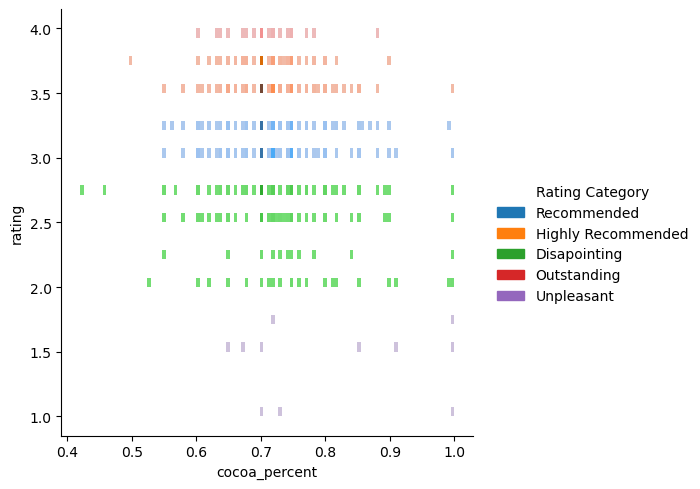

In [19]:
# Creating categorical plot with Rating Category
cat_plot_cacao = sns.displot(x='cocoa_percent', y='rating', hue="Rating Category", data=df_cacao)

### Explanation

The above visual showcases the spread of cocoa percent among the rating category. While there is no siginificant correlation between the percentage of cocoa in a chocolate bar and its ranking, we can see that most highly rated chocolate bars contain between 60 to 80 percent cocoa with only one outlier chocolate bar with 90 percent. Middle rated chocolate bars mostly fall closer between 50 and 90 percent. Low rated chocolate bars are far too spread out and can fall anywhere between 50 and 100 percent cacao.



In [20]:
# Create 'Cacao Percent Category' category column and 'Sweet and Mild' category variable
df_cacao.loc[(df_cacao['cocoa_percent'] >= .40) & (df_cacao['cocoa_percent'] < .60), 'cocoa_percent_classification'] = 'Sweet and Mild'

In [21]:
# Create 'Semi-sweet and Dark' category variable for 'Cacao Percent Category'
df_cacao.loc[(df_cacao['cocoa_percent'] >= .60) & (df_cacao['cocoa_percent'] < .70), 'cocoa_percent_classification'] = 'Semi-sweet and Dark'

In [22]:
# Create 'Bittersweet and Dark' category variable for 'Cacao Percent Category'
df_cacao.loc[(df_cacao['cocoa_percent'] >= .70) & (df_cacao['cocoa_percent'] < .86), 'cocoa_percent_classification'] = 'Bittersweet and Dark'

In [23]:
# Create 'Very Bitter and Extra Dark' category column and 'Sweet and Mild' category variable
df_cacao.loc[(df_cacao['cocoa_percent'] >= .86) & (df_cacao['cocoa_percent'] < 1), 'cocoa_percent_classification'] = 'Very Bitter and Extra Dark'

In [24]:
# Create 'Intense and Unsweetened' category column and 'Sweet and Mild' category variable
df_cacao.loc[df_cacao['cocoa_percent'] == 1.0 , 'cocoa_percent_classification'] = 'Unsweetened'

In [25]:
# Verify value counts in 'Rating Category'
df_cacao['cocoa_percent_classification'].value_counts(dropna = False)

cocoa_percent_classification
Bittersweet and Dark          2144
Semi-sweet and Dark            366
Sweet and Mild                  31
Very Bitter and Extra Dark      26
Unsweetened                     21
Name: count, dtype: int64

In [26]:
df_cacao

company company_location  review_date country_of_bean_origin  \
0       5150           U.S.A.         2019               Tanzania   
1       5150           U.S.A.         2019             Madagascar   
2       5150           U.S.A.         2019     Dominican Republic   
3       5150           U.S.A.         2021                   Fiji   
4       5150           U.S.A.         2021                  India   
...      ...              ...          ...                    ...   
2583  Zotter          Austria         2014                  Blend   
2584  Zotter          Austria         2017               Colombia   
2585  Zotter          Austria         2018                  Blend   
2586  Zotter          Austria         2018                  Congo   
2587  Zotter          Austria         2018                 Belize   

          specific_bean_or_bar_origin  cocoa_percent   ingredients  \
0               Kokoa Kamili, batch 1           0.76      3- B,S,C   
1              Bejofo Estate, batch 1           0.76      3- B,S,C   
2                     Zorzal, batch 1           0.76      3- B,S,C   
3               Matasawalevu, batch 1           0.68      3- B,S,C   
4                   Anamalai, batch 1           0.68      3- B,S,C   
...                               ...            ...           ...   
2583                              Raw           0.80  4- B,S*,C,Sa   
2584                 APROCAFA, Acandi           0.75      3- B,S,C   
2585  Dry Aged, 30 yr Anniversary bar           0.75      3- B,S,C   
2586            Mountains of the Moon           0.70      3- B,S,C   
2587                         Maya Mtn           0.72      3- B,S,C   

     most_memorable_characteristics  rating     Rating Category  \
0         rich cocoa, fatty, bready    3.25         Recommended   
1      cocoa, blackberry, full body    3.75  Highly Recommended   
2            cocoa, vegetal, savory    3.50  Highly Recommended   
3               chewy, off, rubbery    3.00         Recommended   
4     milk brownie, macadamia,chewy    3.50  Highly Recommended   
...                             ...     ...                 ...   
2583         waxy, cloying, vegetal    2.75        Disapointing   
2584      strong nutty, marshmallow    3.75  Highly Recommended   
2585           fatty, earthy, cocoa    3.00         Recommended   
2586   fatty, mild nuts, mild fruit    3.25         Recommended   
2587      muted, roasty, accessible    3.50  Highly Recommended   

     cocoa_percent_classification  
0            Bittersweet and Dark  
1            Bittersweet and Dark  
2            Bittersweet and Dark  
3             Semi-sweet and Dark  
4             Semi-sweet and Dark  
...                           ...  
2583         Bittersweet and Dark  
2584         Bittersweet and Dark  
2585         Bittersweet and Dark  
2586         Bittersweet and Dark  
2587         Bittersweet and Dark  

[2588 rows x 11 columns]

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


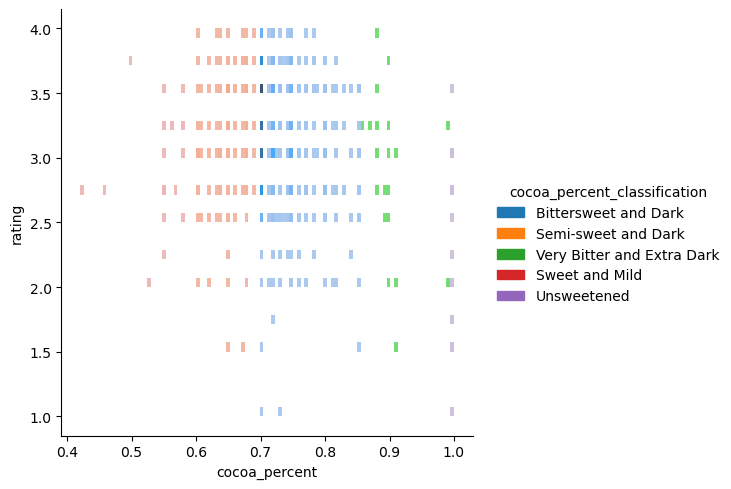

In [27]:
# Creating categorical plot with 'cocoa_percent_classification'
cat_plot_cacao = sns.displot(x='cocoa_percent', y='rating', hue="cocoa_percent_classification", data=df_cacao)

### Explanation 
The category plot showcases that Very Sweet and Bitter Chocolate Bars have the most ratings, as well as the most highest ratings. 

# 0.7 Answers and Hypothesis  

## Key Questions

### 1.) Which manufacturer has the greatest number of high rated chocolate bars?

In [28]:
# Create data frame for 'High Rating' chocolate bars
df_high_rate = df_cacao.loc[df_cacao['Rating Category'] == 'Outstanding']

In [29]:
# verify new dataframe
df_high_rate

company company_location  review_date  \
16                  A. Morin           France         2013   
19                  A. Morin           France         2013   
24                  A. Morin           France         2014   
32                  A. Morin           France         2021   
81                     Amano           U.S.A.         2010   
...                      ...              ...          ...   
2448                Valrhona           France         2012   
2451                Valrhona           France         2015   
2501  White Label aka Mutari           U.S.A.         2022   
2517          Willie's Cacao             U.K.         2016   
2524               Woodblock           U.S.A.         2011   

     country_of_bean_origin               specific_bean_or_bar_origin  \
16                Venezuela                                     Chuao   
19                     Peru                      Chanchamayo Province   
24                     Peru                                   Pablino   
32                   Mexico                                   La Joya   
81                  Ecuador                                    Guayas   
...                     ...                                       ...   
2448              Venezuela                         Otucan, Grand Cru   
2451                   Peru                  Piura, Illanka, Quemazon   
2501                Ecuador  Costa Esmeraldas, CEconche77121620121820   
2517               Colombia                                Los Llanos   
2524              Venezuela                                   Ocumare   

      cocoa_percent   ingredients   most_memorable_characteristics  rating  \
16             0.70    4- B,S,C,L    oily, nut, caramel, raspberry     4.0   
19             0.63      3- B,S,C          sweet, cocoa, tangerine     4.0   
24             0.70    4- B,S,C,L      delicate, hazelnut, brownie     4.0   
32             0.70    4- B,S,C,L       light color, fruit, yogurt     4.0   
81             0.70    4- B,S,C,V     strong spice, intense pepper     4.0   
...             ...           ...                              ...     ...   
2448           0.69  5- B,S,C,V,L     green,unripened fruit,banana     4.0   
2451           0.63  5- B,S,C,V,L      intense, dark berry, grapes     4.0   
2501           0.77      3- B,S,C  complex, hazelnut, dairy, fruit     4.0   
2517           0.70      3- B,S,C       rich cocoa, spicy, cinamon     4.0   
2524           0.70        2- B,S              nutty, tart, coffee     4.0   

     Rating Category cocoa_percent_classification  
16       Outstanding         Bittersweet and Dark  
19       Outstanding          Semi-sweet and Dark  
24       Outstanding         Bittersweet and Dark  
32       Outstanding         Bittersweet and Dark  
81       Outstanding         Bittersweet and Dark  
...              ...                          ...  
2448     Outstanding          Semi-sweet and Dark  
2451     Outstanding          Semi-sweet and Dark  
2501     Outstanding         Bittersweet and Dark  
2517     Outstanding         Bittersweet and Dark  
2524     Outstanding         Bittersweet and Dark  

[115 rows x 11 columns]

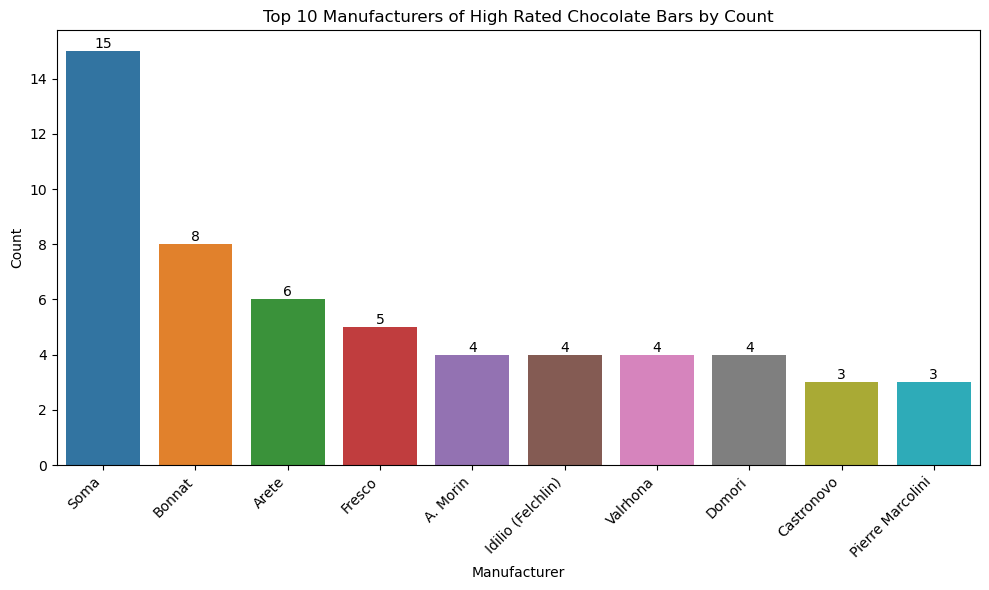

In [30]:
#Create visual for top 10 manufacturers with 'High Rating' chocolate bar

#Get the top 10 manufacturers by count
top_manufacturers = df_high_rate['company'].value_counts().head(10)

# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
bp_2=sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values)
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Top 10 Manufacturers of High Rated Chocolate Bars by Count')
bp_2.bar_label(bp_2.containers[0])
plt.tight_layout()

### Explanation
The above visual showcases the top 10 manufacturers of chocolate bar with 'High Ratings'. 'High Ratings' includes chocolate bars with ratings of 4 or higher. The Soma company has the highest amount of high rated chocolate bars with a count of 15.

### 2.) Where are the highest rated chocolate bars produced?

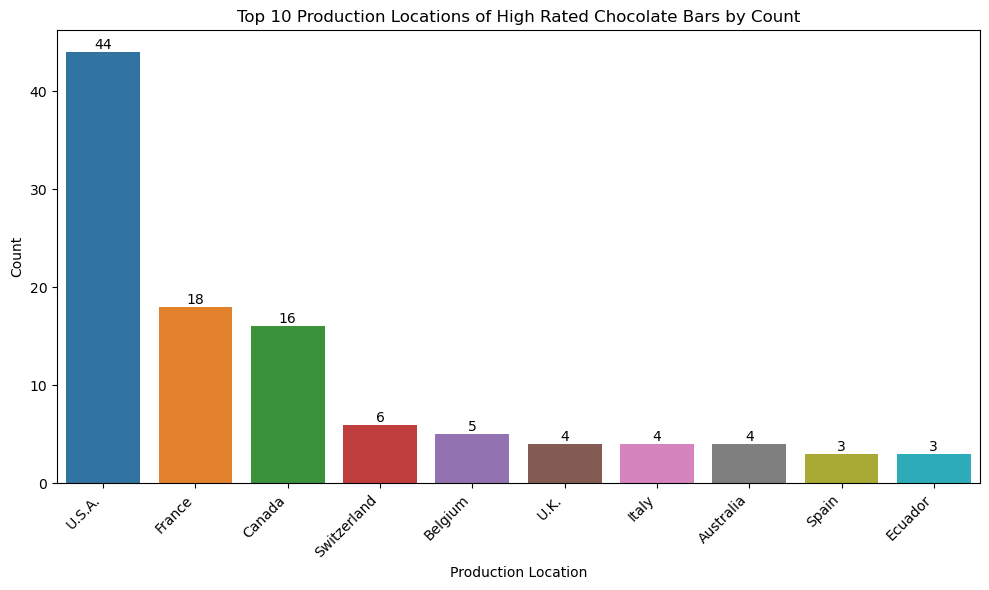

In [31]:
#Create visual for top 10 bar locations with 'High Rating' chocolate bar

#Get the top 10 bar locations by count
top_bar_location = df_high_rate['company_location'].value_counts().head(10)

# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
bp_2=sns.barplot(x=top_bar_location.index, y=top_bar_location.values)
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Production Location')
plt.ylabel('Count')
plt.title('Top 10 Production Locations of High Rated Chocolate Bars by Count')
bp_2.bar_label(bp_2.containers[0])
plt.tight_layout()

### Explanation
The above graph showcases the production location of the highest rated chocolate bars based on number count. The United States of America is the region that produces the most amount of high rated chocolated bars with a count of 44 production companies.

### 3.) Which cacao beans have the highest ratings?

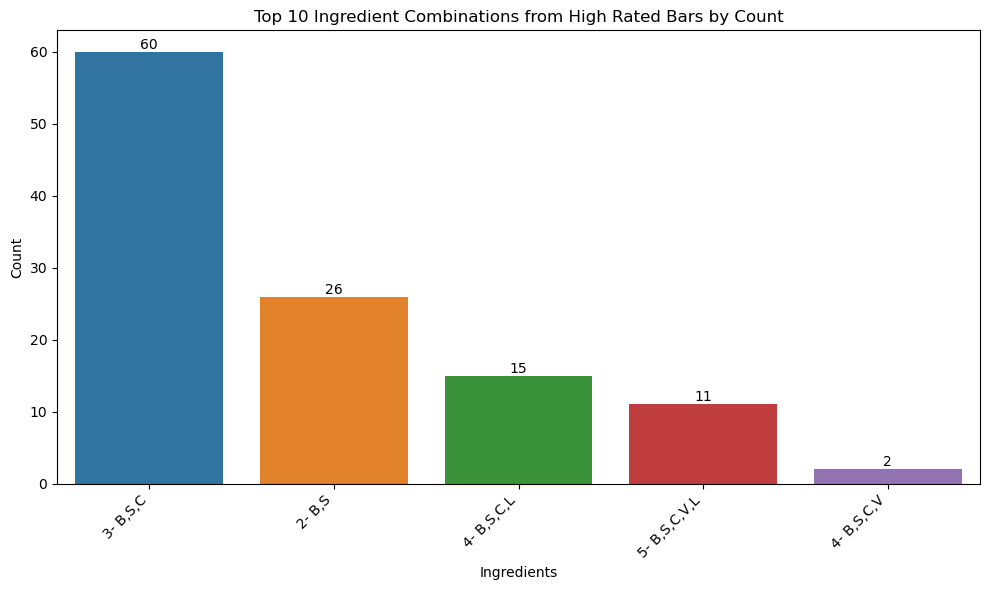

In [32]:
#Create visual for top 10 bean types with 'High Rating'

#Get the top 10 bean type by count
top_bean_type = df_high_rate['ingredients'].value_counts().head(10)

# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
bp_2=sns.barplot(x=top_bean_type.index, y=top_bean_type.values)
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top 10 Ingredient Combinations from High Rated Bars by Count')
bp_2.bar_label(bp_2.containers[0])
plt.tight_layout()

### Explanation
The above visual showcases the top ten ingredients in chocolate bars with a 'High Rating' by count. The ingredient combination of cacao bean, sugar, and cacao butter is the most common in high rated bars with a total count of 60 bars.

### 4.) Where are the highest rated cacao beans grown?

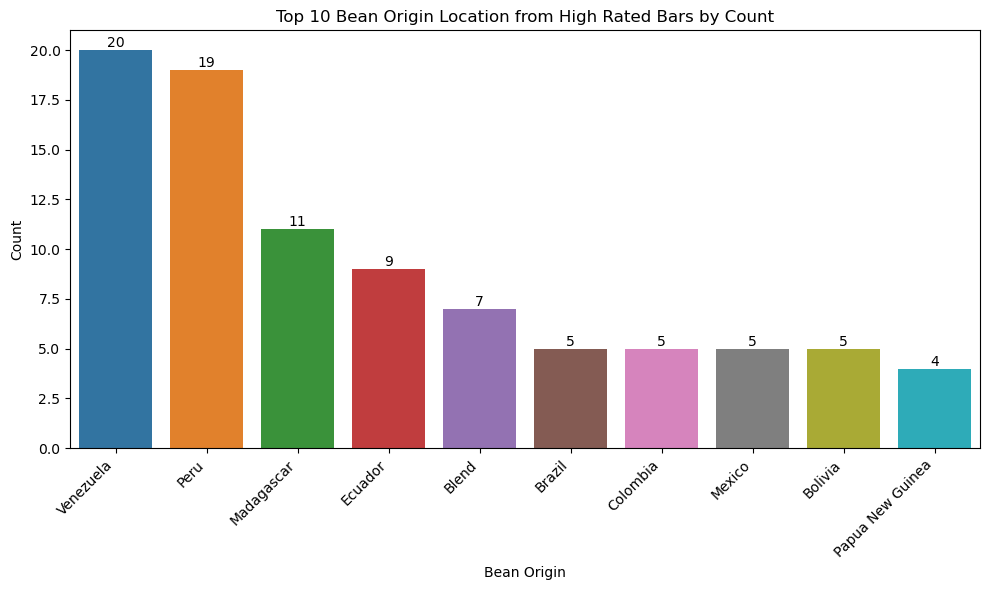

In [33]:
#Create visual for top 10 bean origin locations with 'High Rating'

#Get the top 10 bean origin location by count
top_bean_origin = df_high_rate['country_of_bean_origin'].value_counts().head(10)

# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
bp_2=sns.barplot(x=top_bean_origin.index, y=top_bean_origin.values)
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Bean Origin')
plt.ylabel('Count')
plt.title('Top 10 Bean Origin Location from High Rated Bars by Count')
bp_2.bar_label(bp_2.containers[0])
plt.tight_layout()

### Explanation 
The above visual showcases the location of the cacao beans used to make high rated chocolate bars. Venezuela contains most number of cacao beans used in high rated chocolate bars with a total number of 20 cacao beans.

### 5.) Does a high percentage of cacao result in a higher rating?

 A high percentage of cacao does not result in a higher rating. This is because there is not correlation between a chocolate bars rating and its percentage of cacao.

## Hypothesis

If a chocolate bar has a high cocoa percent, then its final ranking will be on the low end.

In [34]:
# export data frame as csv
df_cacao.to_csv(os.path.join(path,'02 Data','Prepared Data','chocolate_bar_ratings_clean_updated.csv'))